# Interpolacijski polinomi
---

Neka je zadana $n+1$ točka

$$
T_i=(x_i,y_i), \quad i=0,1,\ldots,n,\quad x_i\neq x_j.
$$

## Standradna baza

Kroz zadane točke prolazi _interpolacijski polinom_ $p_n(x)$. Koeficijenti polinoma zadovoljavaju 
sustav linearnih jednadžbi $p_n(x_i)=y_i$, $i=0,\ldots,n$, odnosno

$$
\begin{bmatrix} 
1 & x_0 & x_0^2 & x_0^3 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^n \\
\vdots & & & & \vdots \\
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^n \\
\end{bmatrix}
\begin{bmatrix}a_0\\ a_1 \\ \vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}
$$

Matrica sustava $A$ se zove _Vandermonde-ova matrica_. Njena determinanta dana je formulom

$$ 
\mathop{\mathrm{det}}(A)= \prod_{0\leq j<i\leq n}(x_i-x_j).
$$

Kako su sve apscise različite ($x_i\neq x_j$ za $i\neq j$), vrijedi $\mathop{\mathrm{det}}(A)\neq 0$ pa je matrica $A$ regularna i zadani sustav ima jedinstveno rješenje - dakle, 
> interpolacijski polinom je __jedinstven__.

In [2]:
using Polynomials
using SpecialMatrices
using Winston


Use "AbstractVecOrMat{T}(" instead.


In [3]:
n=6
x=rand(n)
y=rand(n)
a=minimum(x)
b=maximum(x)

0.9092996421480946

In [4]:
A=Vandermonde(x)

6x6 SpecialMatrices.Vandermonde{Float64}:
 1.0  0.0799923  0.00639876  0.000511851  4.09441e-5  3.27521e-6
 1.0  0.53767    0.289089    0.155435     0.0835727   0.0449346 
 1.0  0.658308   0.433369    0.28529      0.187809    0.123636  
 1.0  0.581527   0.338174    0.196658     0.114362    0.0665045 
 1.0  0.9093     0.826826    0.751832     0.683641    0.621634  
 1.0  0.852456   0.726682    0.619464     0.528066    0.450153  

In [5]:
c=full(A)\y

6-element Array{Float64,1}:
  -10.0815
  179.143 
 -666.279 
  957.798 
 -541.937 
   78.4439

In [6]:
p=Poly(c)

Poly(-10.081451356100645 + 179.14343539559098x - 666.2794340636005x^2 + 957.7984983962131x^3 - 541.9374197615057x^4 + 78.44392332586317x^5)

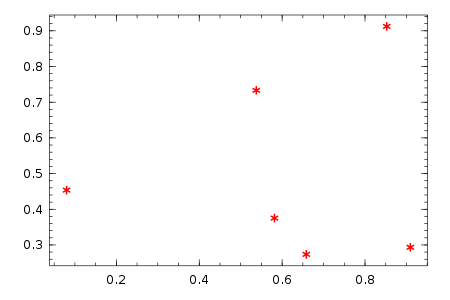

In [7]:
plot(x,y,"r*")

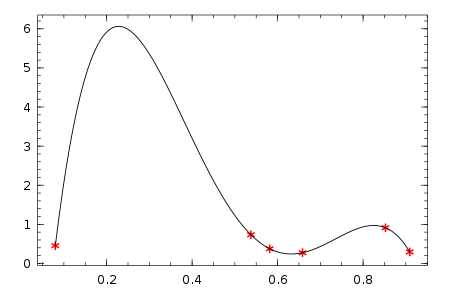

In [8]:
xx=linspace(a,b,100)
pS=polyval(p,xx)
plot(x,y,"r*",xx,pS)

Za rješavanje zadanog sustava standardnim putem potrebno je $O(n^3)$ računskih operacija, no postoje metode kojima se Vandermondeovi sustavi mogu riješiti s $O(n^2)$ operacija.

Za izvrednjavanje polinoma u nekoj točki potrebno je $2n$ operacija (Hornerova shema).

Vandermondeova matrice uglavnom imaju veliku kondiciju pa ovaj način računanja koeficijenata polinoma može biti nestabilan.
Stoga se koriste i druge metode za računanje i izvredjavanje interpolacijskih polinoma.

## Lagrange-ov interpolacijski polinom

Definirajmo $n+1$ polinom stupnja $n$:

$$
L_j(x)=\prod_{{i=0}\atop {i\neq j}}^n \frac{x-x_i}{x_j-x_i}.
$$

Vrijedi 

$$
L_j(x_i)=\begin{cases}0, \quad i\neq j \\ 1,\quad i=j \end{cases}
$$

pa je 

$$
p_n(x)=y_0\, L_0(x)+y_1 \, L_1(x)+\cdots + y_n\,  L_n(x).
$$

Za računanje nazivnika polinoma prvi put je potrebno $O(n^2)$ operacija, ali se potom vrijednost 
$p_n(x)$ računa s $O(n)$ operacija. 

Navodimo implementaciju algoritma koja nije optimalno brza.

In [9]:
cond(A)

147001.08409319806

In [10]:
L(t)=sum(y.*[prod(t-x[[1:j-1;j+1:end]])/prod(x[j]-x[[1:j-1;j+1:end]]) for j=1:n])

L (generic function with 1 method)

In [11]:
pL=Array(Float64,length(xx))
for i=1:length(xx)
    pL[i]=L(xx[i])
end

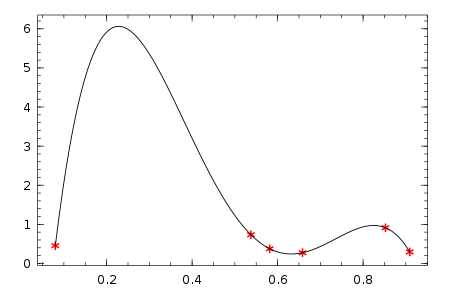

In [12]:
plot(x,y,"r*",xx,pL)

In [13]:
norm(pS-pL,Inf)

2.070343896320992e-12

In [14]:
norm(abs(pS-pL)./abs(pL),Inf)

3.6359834763234266e-13

## Newton-ov interpolacijski polinom

Kod ovog polinoma koristi se baza

$$
1, x-x_0, (x-x_0)(x-x_1), (x-x_0)(x-x_1)(x-x_2),\ldots,(x-x_0)(x-x_1)\cdots (x-x_{n-1})
$$

pa je interpolacijski polinom dan s

$$
p_n(x)=c_0 + c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\cdots +c_n(x-x_0)(x-x_1)\cdots (x-x_{n-1}).
$$

Koeficijenti interpolacijskog polinoma su rješenje sustava jednadžbi $Lc=y$, odnosno

$$
\begin{bmatrix} 
1 & 0 & 0 & 0 & \cdots & 0 \\
1 & x_1-x_0 & 0 & 0 & \cdots & 0 \\
1 & x_2-x_0 & (x_2-x_0)(x_2-x_1) & 0 & \cdots & 0 \\
\vdots & & & & \vdots \\
1 & x_n-x_0 & (x_n-x_0)(x_n-x_1) & (x_n-x_0)(x_n-x_1)(x_n-x_2) & \cdots & (x_n-x_0)\cdots (x_n-x_{n-1}) \\
\end{bmatrix}
\begin{bmatrix}c_0\\ c_1 \\ c_2 \\\vdots \\ a_n\end{bmatrix}
=\begin{bmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix}.
$$

Za formiranje donje trokutaste matrice $L$ potrebno je $O(n^2)$ operacija. Za računanje koeficijenata $c_0,\ldots,c_n$ potrebno je $O(n^2)$ operacija (rješavanje donje trokutastog sustava) i to rješenje je __stabilno__.

Za računanje $p_n(x)$ koristi se postupak koji je vrlo sličan Hornerovoj shemi. 

In [15]:
# racunanje koeficijenata c
function mynewton(x,y)
    n=length(x)
    L=zeros(Float64,n,n)
    L[:,1]=ones(Float64,n)
    for i=2:n
        for j=2:i
            L[i,j]=prod([x[i]-x[k] for k=1:j-1])
        end
    end
    c=L\collect(y)
end  

mynewton (generic function with 1 method)

In [16]:
c=mynewton(x,y)

6-element Array{Float64,1}:
    0.453592
    0.611001
   -7.64479 
  128.329   
 -324.899   
   78.4439  

In [17]:
# Racunanje vrijednosti Newtonovog polinoma zadanog s tockama c i koeficijentima x u tocki t 
function evalnewton(c,x,t::Number)
    p=c[end]
    for i=length(c)-1:-1:1
        p=p*(t-x[i])+c[i]
    end
    p
end

evalnewton (generic function with 1 method)

In [18]:
pN=Array(Float64,length(xx))
for i=1:length(xx)
    pN[i]=evalnewton(c,x,xx[i])
end

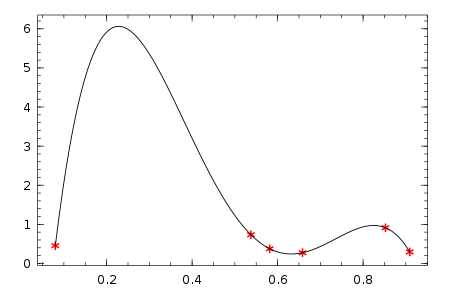

In [19]:
plot(x,y,"r*",xx,pN)

In [20]:
norm(abs(pS-pN)./abs(pN),Inf)

3.6256657025540604e-13

In [21]:
norm(abs(pL-pN)./abs(pN),Inf)

3.784435159095812e-15

> Vidimo da su `pN` i `pL` bliže jedan drugome nego `pS` pa zaključujemo da su zaista točniji. 